<a href="https://colab.research.google.com/github/drscicomm/food-security/blob/main/TextBlob_Sentiment_Analysis_ML_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving text.xlsx to text.xlsx


In [2]:
# Load libraries
import pandas as pd

In [3]:
# Read data into 'data' dataframe
data = pd.read_excel('/content/text.xlsx')
data.head()

,author,year,paper_text,index
0,Madichetty,2020,Social media platform like Twitter is one of t...,0
1,Eyre,2021,Background: Achieving food security remains a ...,1
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,2
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,3
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,4


In [4]:
del data['index']

In [5]:
data = data.dropna(subset=['paper_text'])

In [6]:
data.head()

,author,year,paper_text
0,Madichetty,2020,Social media platform like Twitter is one of t...
1,Eyre,2021,Background: Achieving food security remains a ...
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...
4,Shi,2021,\n\nis only making things worse [22]. Even aft...


In [7]:
# Load the regular expression library
import re

# Remove punctuation
data['paper_text_processed'] = \
data['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
data['paper_text_processed'] = \
data['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data['paper_text_processed'].head()

0    social media platform like twitter is one of t...
1    background: achieving food security remains a ...
2    \n\nabstract\nthe methodological approach for ...
3    \nfood insecurity in the uk has captured publi...
4    \n\nis only making things worse [22] even afte...
Name: paper_text_processed, dtype: object

In [8]:
data.head()

,author,year,paper_text,paper_text_processed
0,Madichetty,2020,Social media platform like Twitter is one of t...,social media platform like twitter is one of t...
1,Eyre,2021,Background: Achieving food security remains a ...,background: achieving food security remains a ...
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,\n\nabstract\nthe methodological approach for ...
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,\nfood insecurity in the uk has captured publi...
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,\n\nis only making things worse [22] even afte...


In [9]:
#Import textblob
from textblob import TextBlob

In [10]:
pap_polarity     = []
pap_subjectivity = []

In [11]:
def paper_polarity_subjectivity(x):
    paper_analysis = TextBlob(x)
    pap_polarity.append(round(paper_analysis.polarity, 2))
    pap_subjectivity.append(round(paper_analysis.subjectivity, 2))
    
_ = data.paper_text_processed.apply(lambda x: paper_polarity_subjectivity(x))
del _

# Creating 
data['paper_polarity']     = pap_polarity
data['paper_subjectivity'] = pap_subjectivity

In [12]:
data.head()

,author,year,paper_text,paper_text_processed,paper_polarity,paper_subjectivity
0,Madichetty,2020,Social media platform like Twitter is one of t...,social media platform like twitter is one of t...,0.06,0.41
1,Eyre,2021,Background: Achieving food security remains a ...,background: achieving food security remains a ...,0.08,0.44
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,\n\nabstract\nthe methodological approach for ...,0.09,0.41
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,\nfood insecurity in the uk has captured publi...,0.09,0.39
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,\n\nis only making things worse [22] even afte...,0.08,0.44


In [13]:
#  Neutral/Positive/ Negative 
def polarity_status(x):

    if x == 0:
        return 'Neutral'
    elif x > 0.00:
        return 'Positive'
    elif x < 0.00:
        return 'Negative'

# Very Objective / Objective / Subjective/ Very Subjective
def subjectivity_status(x):
    if x == 0:
        return 'Very Objective'
    elif x > 0.00 and x < 0.40:
        return 'Objective'
    elif x >= 0.40 and x < 0.70:
        return 'Subjective'
    elif x >= 0.70:
        return 'Very Subjective'

# Putting the polarity & Subjectivity status in the DataFrame
data['polarity_status'] = data.paper_polarity.apply(lambda x: polarity_status(x))
data['subjectivity_status'] = data.paper_subjectivity.apply(lambda x: subjectivity_status(x))

In [14]:
# Checkin the Datafram with the polarity and subjectivity status
data.head()

,author,year,paper_text,paper_text_processed,paper_polarity,paper_subjectivity,polarity_status,subjectivity_status
0,Madichetty,2020,Social media platform like Twitter is one of t...,social media platform like twitter is one of t...,0.06,0.41,Positive,Subjective
1,Eyre,2021,Background: Achieving food security remains a ...,background: achieving food security remains a ...,0.08,0.44,Positive,Subjective
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,\n\nabstract\nthe methodological approach for ...,0.09,0.41,Positive,Subjective
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,\nfood insecurity in the uk has captured publi...,0.09,0.39,Positive,Objective
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,\n\nis only making things worse [22] even afte...,0.08,0.44,Positive,Subjective


# Changing the polarity status into one hot encoding

In [15]:
# change the polarity and sujectivity status to numerical values
neutral_list  = []
positive_list = []
negative_list = []

def polarity_status(x):
    if x == 0.00:
        neutral_list.append(1)
        positive_list.append(0)
        negative_list.append(0)
    elif x > 0.00:
        positive_list.append(1)
        neutral_list.append(0)
        negative_list.append(0)
    elif x < 0.00:
        positive_list.append(0)
        neutral_list.append(0)
        negative_list.append(1)
    
_ = data.paper_polarity.apply(lambda x: polarity_status(x))
del _

data['neutral_paper']  = neutral_list
data['positive_paper'] = positive_list
data['negative_paper'] = negative_list

In [16]:
data.head()

,author,year,paper_text,paper_text_processed,paper_polarity,paper_subjectivity,polarity_status,subjectivity_status,neutral_paper,positive_paper,negative_paper
0,Madichetty,2020,Social media platform like Twitter is one of t...,social media platform like twitter is one of t...,0.06,0.41,Positive,Subjective,0,1,0
1,Eyre,2021,Background: Achieving food security remains a ...,background: achieving food security remains a ...,0.08,0.44,Positive,Subjective,0,1,0
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,\n\nabstract\nthe methodological approach for ...,0.09,0.41,Positive,Subjective,0,1,0
3,Nica-Avram 2021,2021,\nFood insecurity in the UK has captured publi...,\nfood insecurity in the uk has captured publi...,0.09,0.39,Positive,Objective,0,1,0
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,\n\nis only making things worse [22] even afte...,0.08,0.44,Positive,Subjective,0,1,0


In [17]:
pip install matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3a86cca10>]],
      dtype=object)

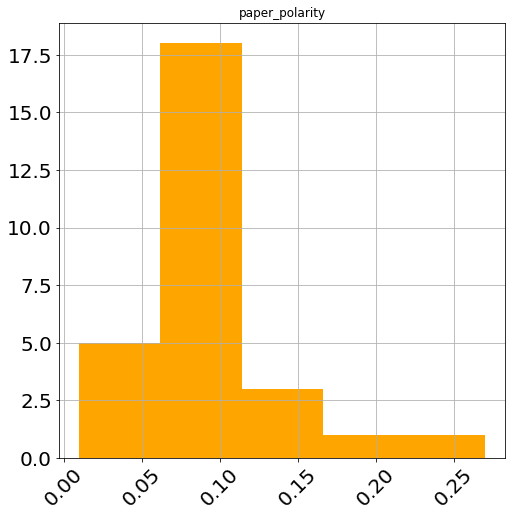

In [18]:
data.hist(column="paper_polarity", figsize=(8,8), 
 xlabelsize=20, ylabelsize=20,
 xrot=45, bins=5, color='orange')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3a86ef510>]],
      dtype=object)

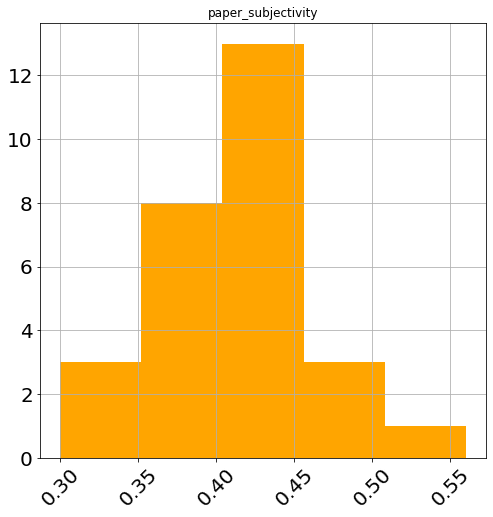

In [19]:
data.hist(column="paper_subjectivity", figsize=(8,8), 
 xlabelsize=20, ylabelsize=20,
 xrot=45, bins=5, color='orange')

In [20]:
#Decription of numerical and categoricalcolumns 
data.describe(include=['O']).T

,count,unique,top,freq
author,28,28,Lentz,1
paper_text,28,28,"\n"" Forecasting food insecurity is essential t...",1
paper_text_processed,28,28,\n\nis only making things worse [22] even afte...,1
polarity_status,28,1,Positive,28
subjectivity_status,28,2,Subjective,20


In [21]:
sentiment_papers = data[['author','year', 'positive_paper','negative_paper','neutral_paper','subjectivity_status']]
sentiment_papers.head()

,author,year,positive_paper,negative_paper,neutral_paper,subjectivity_status
0,Madichetty,2020,1,0,0,Subjective
1,Eyre,2021,1,0,0,Subjective
2,Gadzalo,2020,1,0,0,Subjective
3,Nica-Avram 2021,2021,1,0,0,Objective
4,Shi,2021,1,0,0,Subjective


In [22]:
data.to_excel('polarity.xlsx')

In [23]:
sentiment_papers.to_excel('textblob_sentiment.xlsx')